In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import torch as t
import torch.nn as nn
from pandas_ml_utils import Model, FeaturesAndLabels
from pandas_ml_utils.pytorch import Reshape
from pandas_ml_quant import pd, np

# globals
SYMBOL = "T"
START_DATE = "1995-01-01"
MODEL_REPOSITORY = "/home/kic/models"
MODEL_NAME = NOTEBOOK_NAME.replace(".ipynb", "")

ModuleNotFoundError: No module named 'gym'

In [11]:
print(MODEL_NAME)

Untitled2


In [34]:
import torch as t
import torch.nn as nn

x = t.from_numpy(np.random.rand(2, 10, 1)).float()
w = nn.Parameter(t.Tensor(1, 1))
b = nn.Parameter(t.Tensor(10, 1))

#  original = self.w * x + self.b
w.shape, x.shape, b.shape
w * x + b

x2 = t.repeat_interleave(x, 13, dim=-1)
#sin_trans = t.sin(t.dot(x, self.W) + self.B)

w.shape, x.shape, b.shape, x2.shape

(torch.Size([1, 1]),
 torch.Size([2, 10, 1]),
 torch.Size([10, 1]),
 torch.Size([2, 10, 13]))

In [42]:
#x = K.repeat_elements(x, self.output_dim, -1)
W = nn.Parameter(t.Tensor(13, 13))
B = nn.Parameter(t.Tensor(10, 13))
    
# sin_trans = t.sin(t.dot(x2, W) + B)
t.sin(x2 @ W) + B

tensor([[[ 4.0190e-36,  3.8952e-41, -7.2705e-01,  8.0487e-36,         nan,
           6.8498e-07,  8.2091e+31, -1.8850e-01,  6.6977e-01,  4.0191e-36,
          -7.7777e-01,         nan,  9.3343e-01],
         [ 3.4159e-36,  3.3145e-41, -3.4092e-01,  6.4157e+31,         nan,
           5.8220e-07,  8.0290e-01, -7.8647e-02,  8.2751e-01,  3.4160e-36,
           8.0290e-01,         nan, -8.8359e-01],
         [ 6.7326e-36,  1.9565e-41,  6.4585e+31,  4.0428e-36,         nan,
           3.4406e-07, -3.6542e-01, -3.2431e-01, -6.6909e-01,  2.0188e-36,
          -3.6542e-01,         nan, -9.3359e-01],
         [ 4.3269e-36,  8.3681e+31,  3.9619e-01,  8.6652e-36,         nan,
           7.3746e-07,  9.5204e-01, -3.6392e-01, -4.6580e-01,  4.3269e-36,
           9.5204e-01,         nan, -2.3990e-01],
         [ 8.0339e-07,  7.1962e-41, -6.4265e-01,  5.4435e-36,         nan,
           4.6327e-07,  9.9968e-01,  6.5836e-01, -8.5992e-01,  2.7182e-36,
           9.9968e-01,         nan, -8.6903e-01],


In [18]:
t.autograd.Variable(t.empty(1, 1)).shape
nn.Parameter(t.empty(1, 1)).shape
t.Tensor(1, 1)

tensor([[6.8664e-44]])

In [69]:
import torch as t
import torch.nn as nn
from torch.nn import init

batch = 2
in_dim = (10, 2)
out_dim = 13

x = t.from_numpy(np.random.rand(batch, *in_dim)).float()
w = nn.Parameter(t.Tensor(1, 1))
b = nn.Parameter(t.Tensor(in_dim[0], 1))
W = nn.Parameter(t.Tensor(out_dim * in_dim[1], out_dim * in_dim[1]))
B = nn.Parameter(t.Tensor(in_dim[0], out_dim * in_dim[1]))

init.uniform_(w, 0, 1)
init.uniform_(b, 0, 1)
init.uniform_(W, 0, 1)
init.uniform_(B, 0, 1)



if x.ndim < 3:
    x = x.view(*x.shape, 1)


original = w * x + b
x2 = t.repeat_interleave(x, out_dim, dim=-1)
    
print(w.shape, x.shape, b.shape, original.shape, x2.shape, W.shape, B.shape)

sin = t.sin(x2 @ W) + B
res = t.cat([sin, original], -1)

res.shape
res[0]

torch.Size([1, 1]) torch.Size([2, 10, 2]) torch.Size([10, 1]) torch.Size([2, 10, 2]) torch.Size([2, 10, 26]) torch.Size([26, 26]) torch.Size([10, 26])


torch.Size([2, 10, 28])

torch.Size([1, 1]) torch.Size([2, 10, 1]) torch.Size([10, 1]) torch.Size([2, 10, 1]) torch.Size([2, 10, 13]) torch.Size([13, 13]) torch.Size([10, 13])


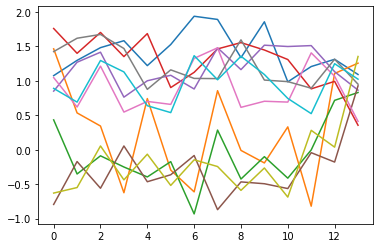

In [88]:
import torch as t
import torch.nn as nn
from torch.nn import init

batch = 2
in_dim = (10, 1)
out_dim = 13

x = t.from_numpy(np.random.rand(batch, *in_dim)).float()
w = nn.Parameter(t.Tensor(1, 1))
b = nn.Parameter(t.Tensor(in_dim[0], 1))
W = nn.Parameter(t.Tensor(out_dim * in_dim[1], out_dim * in_dim[1]))
B = nn.Parameter(t.Tensor(in_dim[0], out_dim * in_dim[1]))

init.uniform_(w, 0, 1)
init.uniform_(b, 0, 1)
init.uniform_(W, 0, 1)
init.uniform_(B, 0, 1)



if x.ndim < 3:
    x = x.view(*x.shape, 1)


original = w * x + b
x2 = t.repeat_interleave(x, out_dim, dim=-1)
    
print(w.shape, x.shape, b.shape, original.shape, x2.shape, W.shape, B.shape)

sin = t.sin(x2 @ W) + B
res = t.cat([sin, original], -1)[0]

res.shape

for i in range(in_dim[0]):
    plt.plot(res[i].detach().numpy())

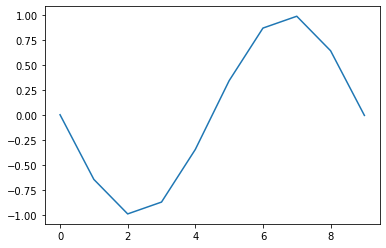

In [103]:
plt.plot(np.sin(np.linspace(-3.145, 3.145, 10)))

In [ ]:
# y = a * sin B(x + c) + D
# D = mean of all data
# A = (max - min) / 2  # we wnat to use a quantile there ... 
# B = 2pi / time per cycle | 1 cycle is from top to top where cycles are x'sdomain like seconds ... 
# c =   horizontal shift
  

Amplitude=1.0115471989701843, Angular freq.=1.9920761190850638, phase=0.5895130150409261, offset=4.011397245113785, Max. Cov.=0.01344529082816578


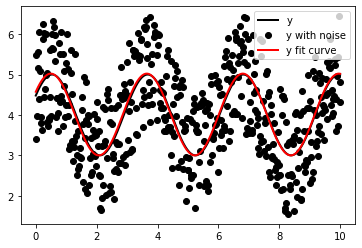

In [108]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}


N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
tt = numpy.linspace(0, 10, N)
tt2 = numpy.linspace(0, 10, 10*N)
yy = amp*numpy.sin(omega*tt + phase) + offset
yynoise = yy + noise*(numpy.random.random(len(tt))-0.5)

res = fit_sin(tt, yynoise)
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s, offset=%(offset)s, Max. Cov.=%(maxcov)s" % res )

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()

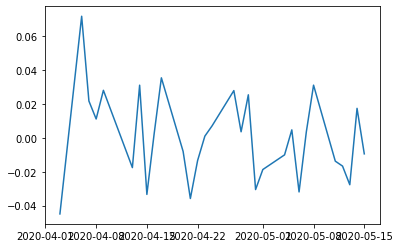

In [110]:
df = pd.fetch_yahoo("T")

r = df["Close"].pct_change()[-30:]
plt.plot(r)

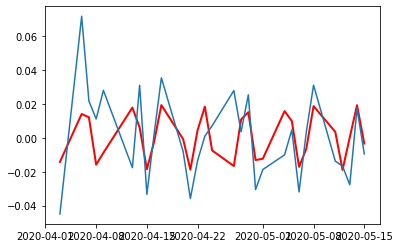

In [125]:
from matplotlib.dates import date2num

res = fit_sin(np.linspace(0, 1, len(r)), r.values)

plt.plot(r.index, res["fitfunc"](np.linspace(0, 1, len(r))), "r-", label="y fit curve", linewidth=2)
plt.plot(r)

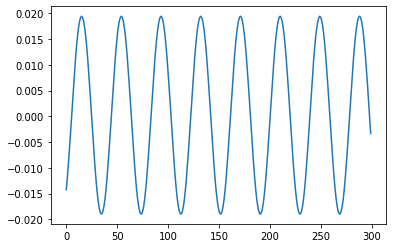

In [127]:
plt.plot(res["fitfunc"](np.linspace(0, 1, len(r)*10)))

In [109]:
import investpy

#investpy.search_bonds('country', value='united states')
#investpy.search_stocks('country', value='united states')
#3a = "stocks::AAPL".split("::")
df.add_prefix("das")

dasVIX                          dasTICK                         
           dasOpen dasHigh  dasLow dasClose dasOpen dasHigh  dasLow dasClose
Date                                                                        
1995-01-03  0.1409  0.1471  0.1339   0.1425  0.0030  0.2210 -0.2170   0.2200
1995-01-04  0.1387  0.1415  0.1353   0.1353  0.0240  0.3110 -0.1250   0.3110
1995-01-05  0.1370  0.1419  0.1337   0.1350  0.0130  0.0995 -0.0555   0.0615
1995-01-06  0.1367  0.1376  0.1279   0.1313  0.0550  0.1630 -0.2055   0.0460
1995-01-09  0.1353  0.1408  0.1321   0.1333 -0.0045  0.0870 -0.2305   0.0450
...            ...     ...     ...      ...     ...     ...     ...      ...
2020-05-13  0.3274  0.3742  0.3077   0.3528 -0.0045  0.4900 -0.8510  -0.0635
2020-05-14  0.3516  0.3928  0.3233   0.3261 -0.8785  0.7165 -0.8960   0.2920
2020-05-15  0.3250  0.3513  0.3104   0.3189 -0.4945  0.5815 -0.4975  -0.0445
2020-05-18  0.3071  0.3108  0.2835   0.2930  1.0440  1.0440 -0.2735   0.3035
2020-05-19  0.2873  0.3001  0.2850   0.2902 -0.2360  0.4425 -0.4215  -0.0415

[6354 rows x 8 columns]

In [105]:
investpy.get_stock_historical_data(stock='BA', from_date='01/01/1995', to_date='31/12/2020', country='united states')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
1995-01-03,23.25,23.56,23.06,23.38,1299200,USD
1995-01-04,23.50,23.56,23.25,23.31,1227600,USD
1995-01-05,23.25,23.50,23.19,23.38,1744000,USD
1995-01-06,23.38,24.12,23.31,23.81,2084200,USD
1995-01-09,23.75,24.00,23.69,23.81,1178600,USD
1995-01-10,23.94,24.12,23.69,23.69,1416000,USD
1995-01-11,23.75,23.94,23.56,23.62,1507400,USD
1995-01-12,23.62,24.62,23.62,24.56,2536600,USD
1995-01-13,24.50,24.88,24.31,24.69,2677200,USD


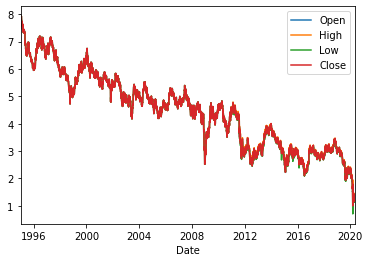

In [110]:
investpy.get_bond_historical_data(bond='U.S. 30Y',  from_date='01/01/1995', to_date='31/12/2020').plot()

In [44]:
# a1 * MSE(y_hat, y) + a2 * PSE(y_hat, _)

#pd.fetch_yahoo("^TICK")

import investpy

#investpy.indices.get_index_countries()

#df = investpy.get_stock_recent_data(stock='TICK', country='united states')
#df = investpy.get_index_historical_data(index='TIC', country='united states', from_date='01/01/2000', to_date='31/12/2020')
#print(df.head())

investpy.search_indices('name', value='Tick')

,country,name,full_name,symbol,currency,class,market
0,united states,NYSE Tick Index,NYSE Tick Index,TIC.N,USD,other_indices,world_indices
1,united states,AMEX Tick Index,AMEX Tick Index,TIC.A,USD,other_indices,world_indices


In [116]:
tick = investpy.get_index_historical_data(index='NYSE Tick Index', country='united states', from_date='01/01/1960', to_date='31/12/2039')[["Open", "High", "Low", "Close"]]
vix = pd.fetch_yahoo("^VIX")[["Open", "High", "Low", "Close"]]

IndexError: ERR#0046: index information unavailable or not found.

In [112]:
display(tick.describe())
display(vix.describe())

,Open,High,Low,Close
count,6455.000000,6455.000000,6455.000000,6455.000000
mean,77.051743,909.344694,-829.681177,250.439040
std,414.968645,341.380842,349.496659,430.907097
min,-1974.000000,2.000000,-1974.000000,-1447.000000
25%,-52.000000,711.500000,-1063.000000,-23.000000
50%,20.000000,972.000000,-857.000000,253.000000
75%,232.000000,1160.000000,-626.000000,541.500000
max,2088.000000,2088.000000,1469.000000,1602.000000


,Open,High,Low,Close
count,7656.000000,7656.000000,7656.000000,7656.000000
mean,19.397517,20.161083,18.689854,19.329126
std,8.176469,8.627473,7.679058,8.110624
min,9.010000,9.310000,8.560000,9.140000
25%,13.620000,14.240000,13.130000,13.580000
50%,17.290000,17.890000,16.705000,17.275000
75%,22.722500,23.490000,22.020000,22.630000
max,82.690000,89.530000,72.760000,82.690000


In [53]:
df = (vix / 100).inner_join(tick / 2000, prefix_left='VIX', prefix='TICK', force_multi_index=True)
df.tail() 

VIX                            TICK                        
              Open    High     Low   Close    Open    High     Low   Close
Date                                                                      
2020-05-13  0.3274  0.3742  0.3077  0.3528 -0.0045  0.4900 -0.8510 -0.0635
2020-05-14  0.3516  0.3928  0.3233  0.3261 -0.8785  0.7165 -0.8960  0.2920
2020-05-15  0.3250  0.3513  0.3104  0.3189 -0.4945  0.5815 -0.4975 -0.0445
2020-05-18  0.3071  0.3108  0.2835  0.2930  1.0440  1.0440 -0.2735  0.3035
2020-05-19  0.2873  0.3001  0.2850  0.2902 -0.2360  0.4425 -0.4215 -0.0415

VIX                                                TICK  \
              Open         High          Low        Close         Open   
count  6354.000000  6354.000000  6354.000000  6354.000000  6354.000000   
mean      0.199503     0.207730     0.191495     0.198484     0.037184   
std       0.085985     0.091117     0.080464     0.085371     0.207591   
min       0.090100     0.093100     0.085600     0.091400    -0.987000   
25%       0.138000     0.143500     0.132500     0.136825    -0.026000   
50%       0.179950     0.187400     0.173300     0.179500     0.009250   
75%       0.234100     0.242800     0.225900     0.233400     0.112000   
max       0.826900     0.895300     0.727600     0.826900     1.044000   

                                             
              High          Low       Close  
count  6354.000000  6354.000000  6354.00000  
mean      0.458986    -0.423362     0.12524  
std       0.167711     0.160728     0.21596  
min       0.003000    -0.987000    -0.72350  
25%       0.362625    -0.533000    -0.01150  
50%       0.488250    -0.432000     0.12650  
75%       0.581875    -0.320500     0.27050  
max       1.044000     0.734500     0.80100

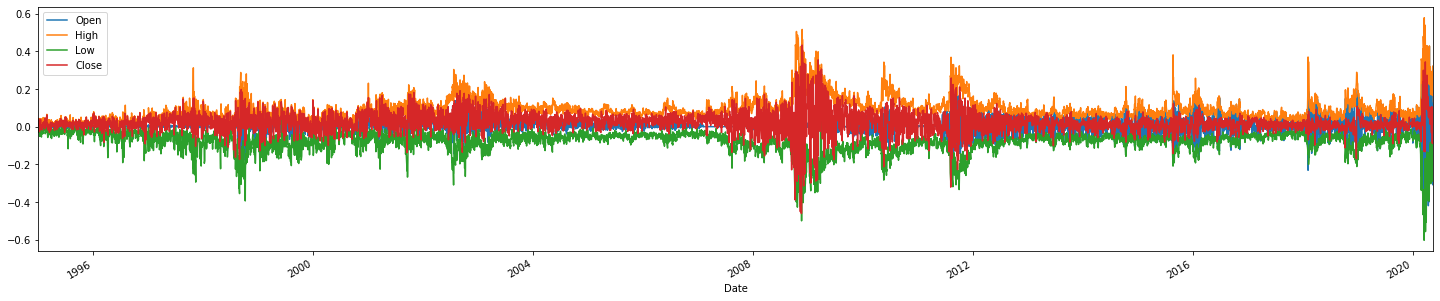

In [59]:
(df["TICK"] * df["VIX"]).plot(figsize=(25, 5))
df.describe()

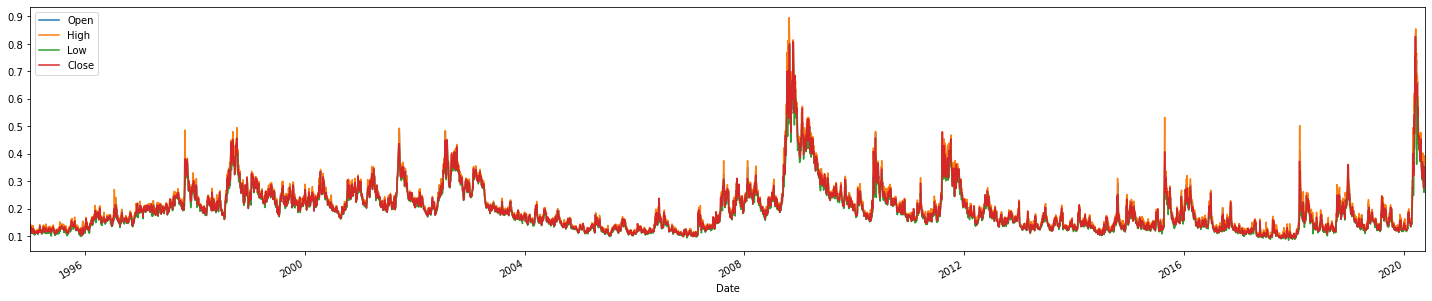

In [60]:
df["VIX"].plot(figsize=(25, 5))

In [78]:
from scipy.io.wavfile import write

data = (df["TICK"] * df["VIX"])["Close"].values
scaled = data # np.int16(data/np.max(np.abs(data)) * 32767)
write('/tmp/test.wav', 2000, scaled)

(array([-1,  5,  5, ..., -1,  5, -1]),
 [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
  (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
  (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
  (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
  (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
  (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)])

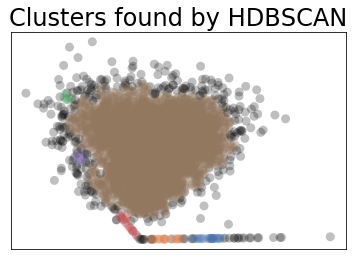

In [41]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
import hdbscan

data_array = df[["Open", "High", "Low", "Close"]].values
pca = PCA(n_components=2).fit(data_array)
pca_2d = pca.transform(data_array)

plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    #plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    return labels, palette

data = pca_2d.copy()    
#plot_clusters(data, cluster.KMeans, (), {'n_clusters':6})
plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':8})

In [196]:
data.shape

(6454, 2)

In [20]:
for srv in notebookapp.list_running_servers():
    print(srv)

{'base_url': '/', 'hostname': '0.0.0.0', 'notebook_dir': '/home/kic/projects/pandas-quant', 'password': False, 'pid': 9436, 'port': 8001, 'secure': False, 'token': '', 'url': 'http://0.0.0.0:8001/'}
